In [1]:
%matplotlib inline
import mglearn
import numpy as np
import matplotlib.pyplot as plt

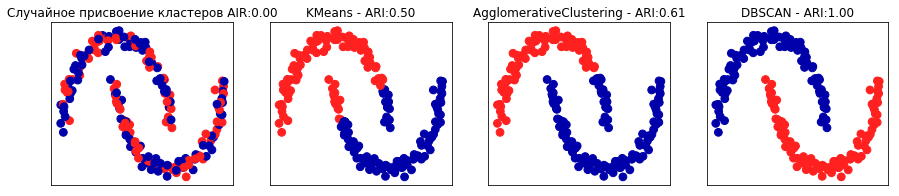

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler=StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

algorithms=[KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm2, s=60)
axes[0].set_title("Случайное присвоение кластеров AIR:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [16]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

pca=PCA()
pca.fit_transform(X_people)
X_pca=pca.transform(X_people)